# Solving the equations of motion for two vertical springs

In [7]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from scipy.integrate import odeint # needed for the numerical solution of the system of differential equations

%matplotlib inline

# Definition of function
## Function for printing the solution of the differential equation

In [2]:
def print_graph(solution, m, k1, k2, version):
    x1, y1, x2, y2 = solution[0], solution[1], solution[2], solution[3]

    plt.figure(1, figsize=(15, 6))

    plt.xlabel('$t$ in s', fontsize=18)
    plt.ylabel('displacement $x_i$ in m', fontsize=18)
    plt.grid(False)

    plt.xlim(xmin=0, xmax=stoptime)
    lw = 1
    plt.plot(t, x1, 'b', linewidth=lw)
    plt.plot(t, x2, 'g', linewidth=lw)
    
    plt.title('parameters: $m$ = ' + str(m) + ' kg, $k_1$ = ' + str(k1) + ' Nm$^{-1}$, $k_2$ = ' + str(k2) + ' Nm$^{-1}$', fontsize=20)
    plt.legend((r'$x_1$', r'$x_2$'), fontsize=18)

    plt.savefig('two_springs_simulation' + version + '.png', dpi=100)

## Functions for solving the equations of motion

Here we call the solver for ordinary differential equations (ode's) of scipy. The equations of motions resulting from Newton's law

\begin{split}
  m\ddot{x_1} &= k_2 \cdot (x_2 - x_1) - k_1 x_1 \\
  m\ddot{x_2} &= k_2 \cdot (x_1 - x_2)
\end{split}

are defined in the function $vectorfield(w, t, p)$ with arguments $w$, $t$, $p$. In order to solve the system of differential equations we set 

\begin{split}
  \dot{x_1} &=: y_1 \\
  \dot{x_2} &=: y_2
\end{split} 

to convert it in a system of first order equations. Note that in this case we are regarding a frictionless system. To consider friction we could introduce an attenuation term proportional to the velocities $\dot{x_1}$ and $\dot{x_2}$.

In [3]:
def solve_ode(m, k1, k2, x1, y1, x2, y2, t, abserr, relerr):
    p = [m, k1, k2]
    w0 = [x1, y1, x2, y2]

    ode_solution = odeint(vectorfield, w0, t, args=(p, ),
                      atol=abserr, rtol=relerr)

    return pd.DataFrame(ode_solution)

In [4]:
def vectorfield(w, t, p):
    x1, y1, x2, y2 = w
    m, k1, k2 = p
    
    f = [y1, 
        (1 / m) * (k2 * (x2 - x1) - k1 * x1),
        y2, 
        (k2 / m) * (x1 - x2)] # here we define the equations of motions, basically this can be regarded as a vector field
    
    return f

In [5]:
# ODE solver parameters - definition of the allowed errors
abserr = 1.0e-8 
relerr = 1.0e-6

stoptime = 20.0 # set the time intervall of interest
t = np.linspace(0, stoptime, 1000)

## Calling the solver and plotting solutions for specific cases
Here we set the initial values for our system, call the solver and plot the solution which is saved as a .png image. In the first case we examine a system where $k_2 >> k_1$. The result is a superimposed sinusoidal function. SI-units are used in the following examples.

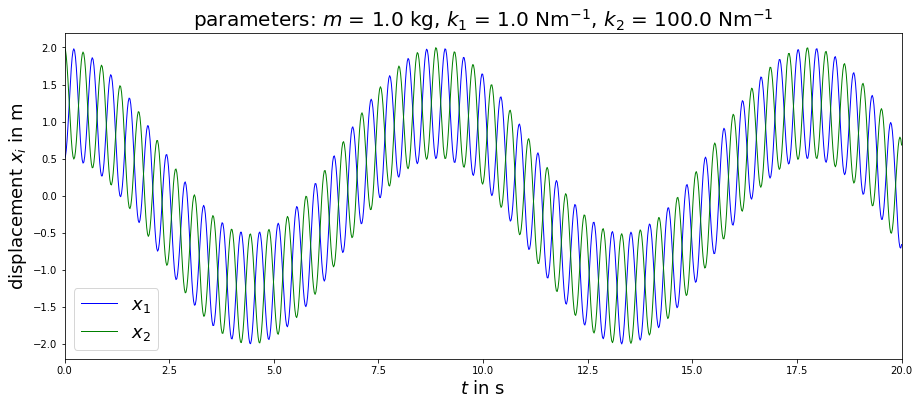

In [8]:
version = '1'

# values of the parameters
m = 1.0
k1 = 1.0
k2 = 100.0

# initial conditions
x1 = 0.5
y1 = 0.0 # initial velocity
x2 = 2.0
y2 = 0.0 # initial velocity

# call functions to solve differential equation and print solution
ode_solution = solve_ode(m, k1, k2, x1, y1, x2, y2, t, abserr, relerr)

print_graph(ode_solution, m, k1, k2, version)

Now we have a look at a system where $k_2 \approx k_1$.

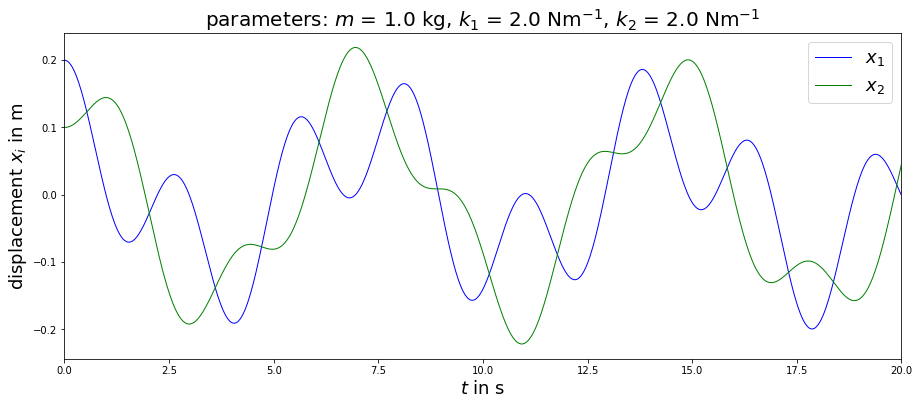

In [8]:
version = '2'

# values of the parameters
m = 1.0
k1 = 2.0
k2 = 2.0

# initial conditions 
x1 = 0.2
y1 = 0.0 # initial velocity
x2 = 0.1
y2 = 0.0 # initial velocity

# call functions to solve differential equation and print solution
ode_solution = solve_ode(m, k1, k2, x1, y1, x2, y2, t, abserr, relerr)

print_graph(ode_solution, m, k1, k2, version)

If we set $k_1 >> k_2$ and the initial displacement of $x_1$ is small compared to $x_2$, the oscillation of the first mass is much smaller in amplitude and much higher in frequency than of the second.

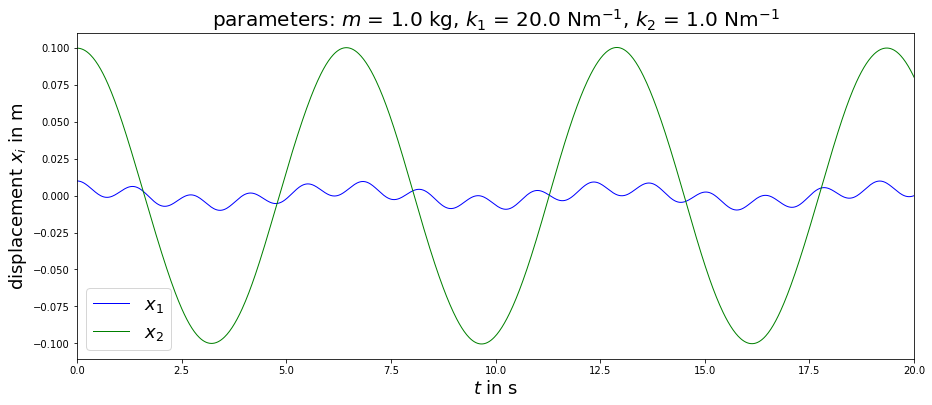

In [11]:
version = '4'

# values of the parameters
m = 1.0
k1 = 20.0
k2 = 1.0

# initial conditions
x1 = 0.01
y1 = 0.0 # initial velocity
x2 = 0.1
y2 = 0.0 # initial velocity

# call functions to solve differential equation and print solution
ode_solution = solve_ode(m, k1, k2, x1, y1, x2, y2, t, abserr, relerr)

print_graph(ode_solution, m, k1, k2, version)